# 1.Loading the libraries and data


In [ ]:
#Loading the libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score,accuracy_score

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.inspection import permutation_importance


# 2.Understanding the data

In [ ]:
#Understanding the data
df=pd.read_csv('Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


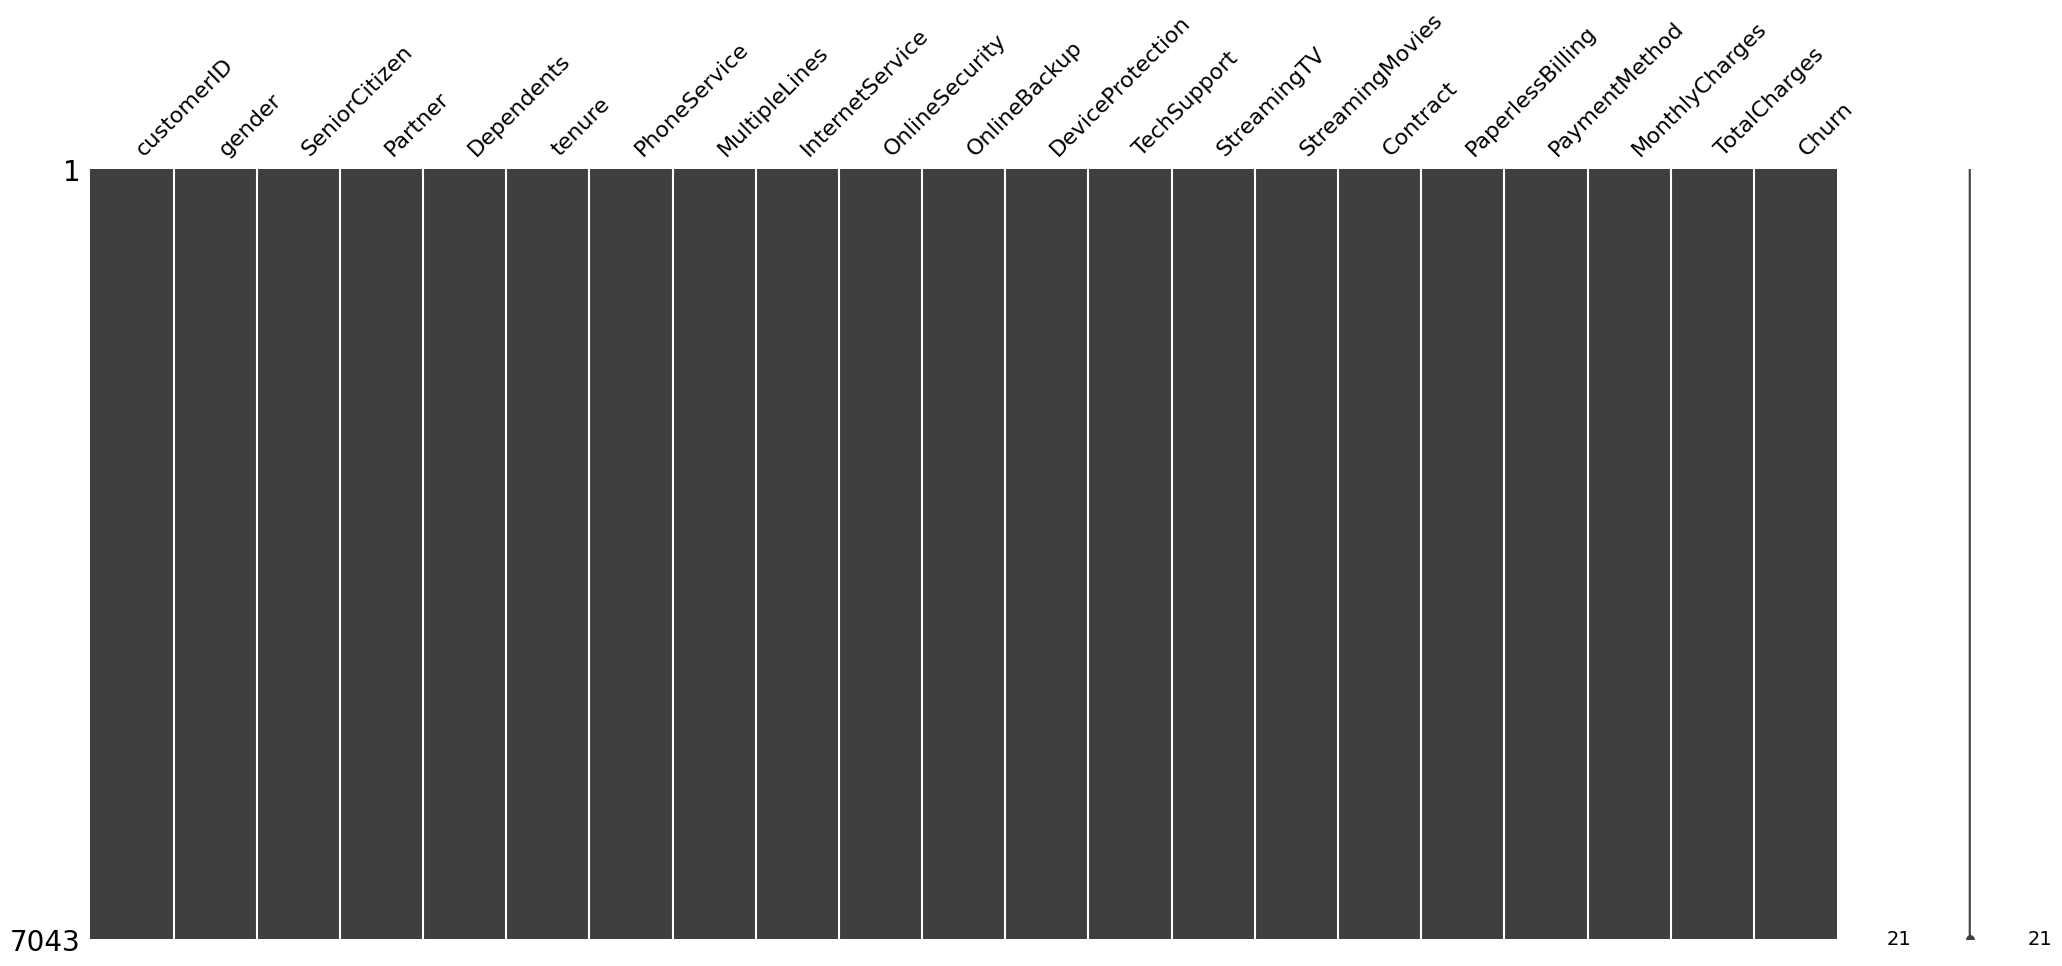

In [ ]:
msno.matrix(df);

In [ ]:
#Changing all the columns to CamelCase
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID' : 'CustomerID'}, inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
unique_dict = {col: df[col].unique() for col in df.columns}
unique_dict

{'CustomerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'Tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], 

In [ ]:
df[df.duplicated(subset=['CustomerID'])]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df=df.drop('CustomerID', axis=1)

# 3.Data Preprocessing

In [ ]:
#object dtype to float type, for ' ' converted to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.groupby('Gender')['Churn'].value_counts()


Gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

In [ ]:
df.groupby('Churn')[['MonthlyCharges', 'TotalCharges', 'Tenure']].agg(['mean','std'])




MonthlyCharges            TotalCharges                  Tenure  \
                mean        std         mean          std       mean   
Churn                                                                  
No         61.265124  31.092648  2555.344141  2329.456984  37.569965   
Yes        74.441332  24.666053  1531.796094  1890.822994  17.979133   

                  
             std  
Churn             
No     24.113777  
Yes    19.531123

In [ ]:
#Which PaymentMethod contributes the MOST to total churn?
df[df.Churn=='Yes'].groupby('PaymentMethod').size() / df[df.Churn=='Yes'].shape[0]


,0
PaymentMethod,
Bank transfer (automatic),0.138042
Credit card (automatic),0.124131
Electronic check,0.573034
Mailed check,0.164794


In [ ]:
# Total revenue leakage due to churn (contract category)
df[df.Churn=='Yes'].groupby('Contract')['MonthlyCharges'].sum()


,MonthlyCharges
Contract,
Month-to-month,120847.10
One year,14118.45
Two year,4165.30


In [ ]:
df.groupby('Churn')[['OnlineSecurity','TechSupport','StreamingTV']].apply(lambda x: (x=='Yes').mean())


,OnlineSecurity,TechSupport,StreamingTV
Churn,,,
No,0.333204,0.335137,0.365868
Yes,0.157838,0.165864,0.435527


In [ ]:
df[np.isnan(df['TotalCharges'])]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#NaN is replaced with median value
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
#Nan is replaced with mode(Categorical string)
cat_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
            'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df_clean = df.copy()

# Tenure should be 0–72
df_clean = df_clean[(df_clean['Tenure'] >= 0) & (df_clean['Tenure'] <= 72)]

# Monthly charges normally 0–200
df_clean = df_clean[(df_clean['MonthlyCharges'] >= 0) & (df_clean['MonthlyCharges'] <= 200)]

# TotalCharges ≥ 0 and should not be extremely high
df_clean = df_clean[df_clean['TotalCharges'] >= 0]


In [ ]:
# IQR-Based Outlier Removal - IQR formula: Q3 + 1.5×IQR (upper), Q1 - 1.5×IQR (lower)
df_iqr = df.copy()

for col in num_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

df_iqr.shape


(7043, 20)

In [ ]:
# Z-Score Based Outlier Removal-Remove values beyond 3 standard deviations.
df_z = df.copy()

for col in num_cols:
    z = (df_z[col] - df_z[col].mean()) / df_z[col].std()
    df_z = df_z[np.abs(z) <= 3]

df_z.shape


(7043, 20)

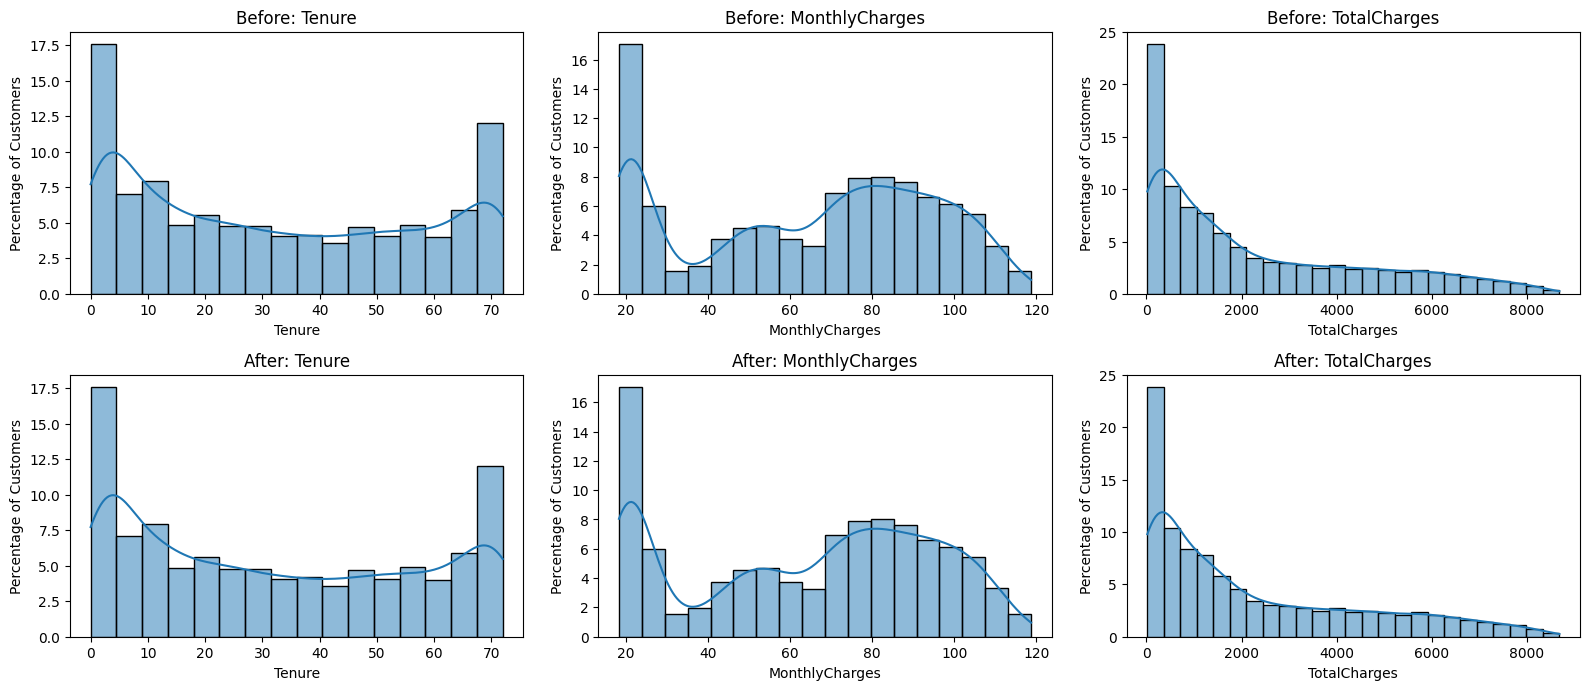

In [ ]:
#Histogram Distribution
plt.figure(figsize=(16,10))

for i, col in enumerate(num_cols, 1):
    # Before cleaning
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, stat="percent")
    plt.title(f"Before: {col}")
    plt.ylabel("Percentage of Customers")

    # After cleaning
    plt.subplot(3, 3, i+3)
    sns.histplot(df_clean[col], kde=True, stat="percent")
    plt.title(f"After: {col}")
    plt.ylabel("Percentage of Customers")

plt.tight_layout()
plt.show()


**1. Tenure Distribution**
*   Findings: Most customers fall between 0–12 months; cleaning didn’t change the shape.
*   Insights: Customer base is dominated by new users.
*   Recommendation: Strengthen early onboarding and first-90-days engagement.

**2. MonthlyCharges Distribution**
*   Findings: Two charge groups appear (low 15–40, high 70–110); no major outliers.
*   Insights: High-charge customers form the largest segment and are more churn-prone.
*   Recommendation: Offer flexible or discounted plan options for high-paying users.

**3. TotalCharges Distribution**
*   Findings: Strong right skew; low values for new customers, high values for long-term users.
*   Insights: TotalCharges reflects customer age — low values = new customers.
*  Recommendation: Target low-TotalCharge users with retention programs and long-term offers.



#  4.Exploratory Data Analysis (EDA)


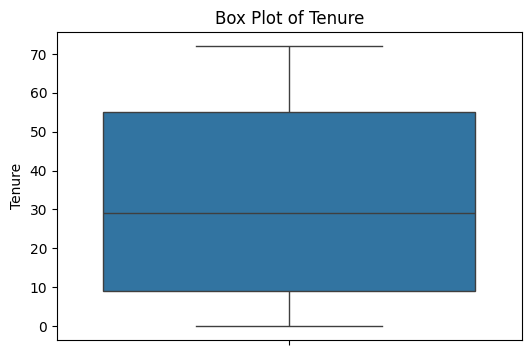

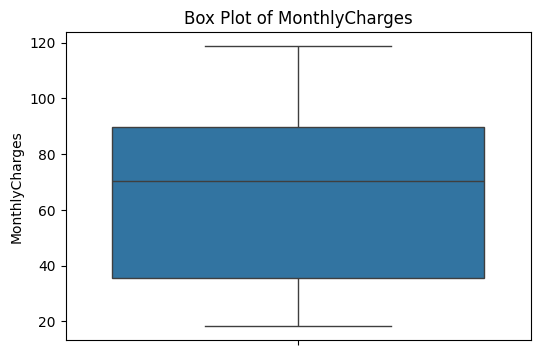

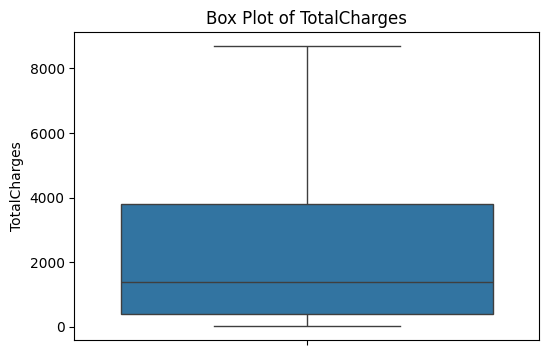

In [ ]:
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


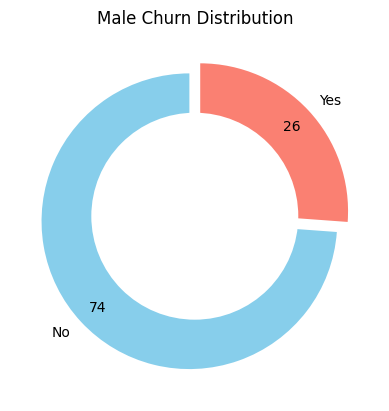

In [ ]:
# Count of Male Churn
male_churn_counts = df[df['Gender']=='Male']['Churn'].value_counts()

# Colors for No and Yes
colors = ['skyblue', 'salmon']  # No = skyblue, Yes = salmon

# Explode to slightly separate slices
explode = (0.05, 0.05)

# Plot donut chart
plt.pie(
    male_churn_counts,
    labels=male_churn_counts.index,  # No / Yes
    colors=colors,
    autopct='%1.0f',                 # show count
    pctdistance=0.85,
    explode=explode,
    startangle=90
)

# Draw circle in the middle to make it donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title("Male Churn Distribution")

# Show chart
plt.show()



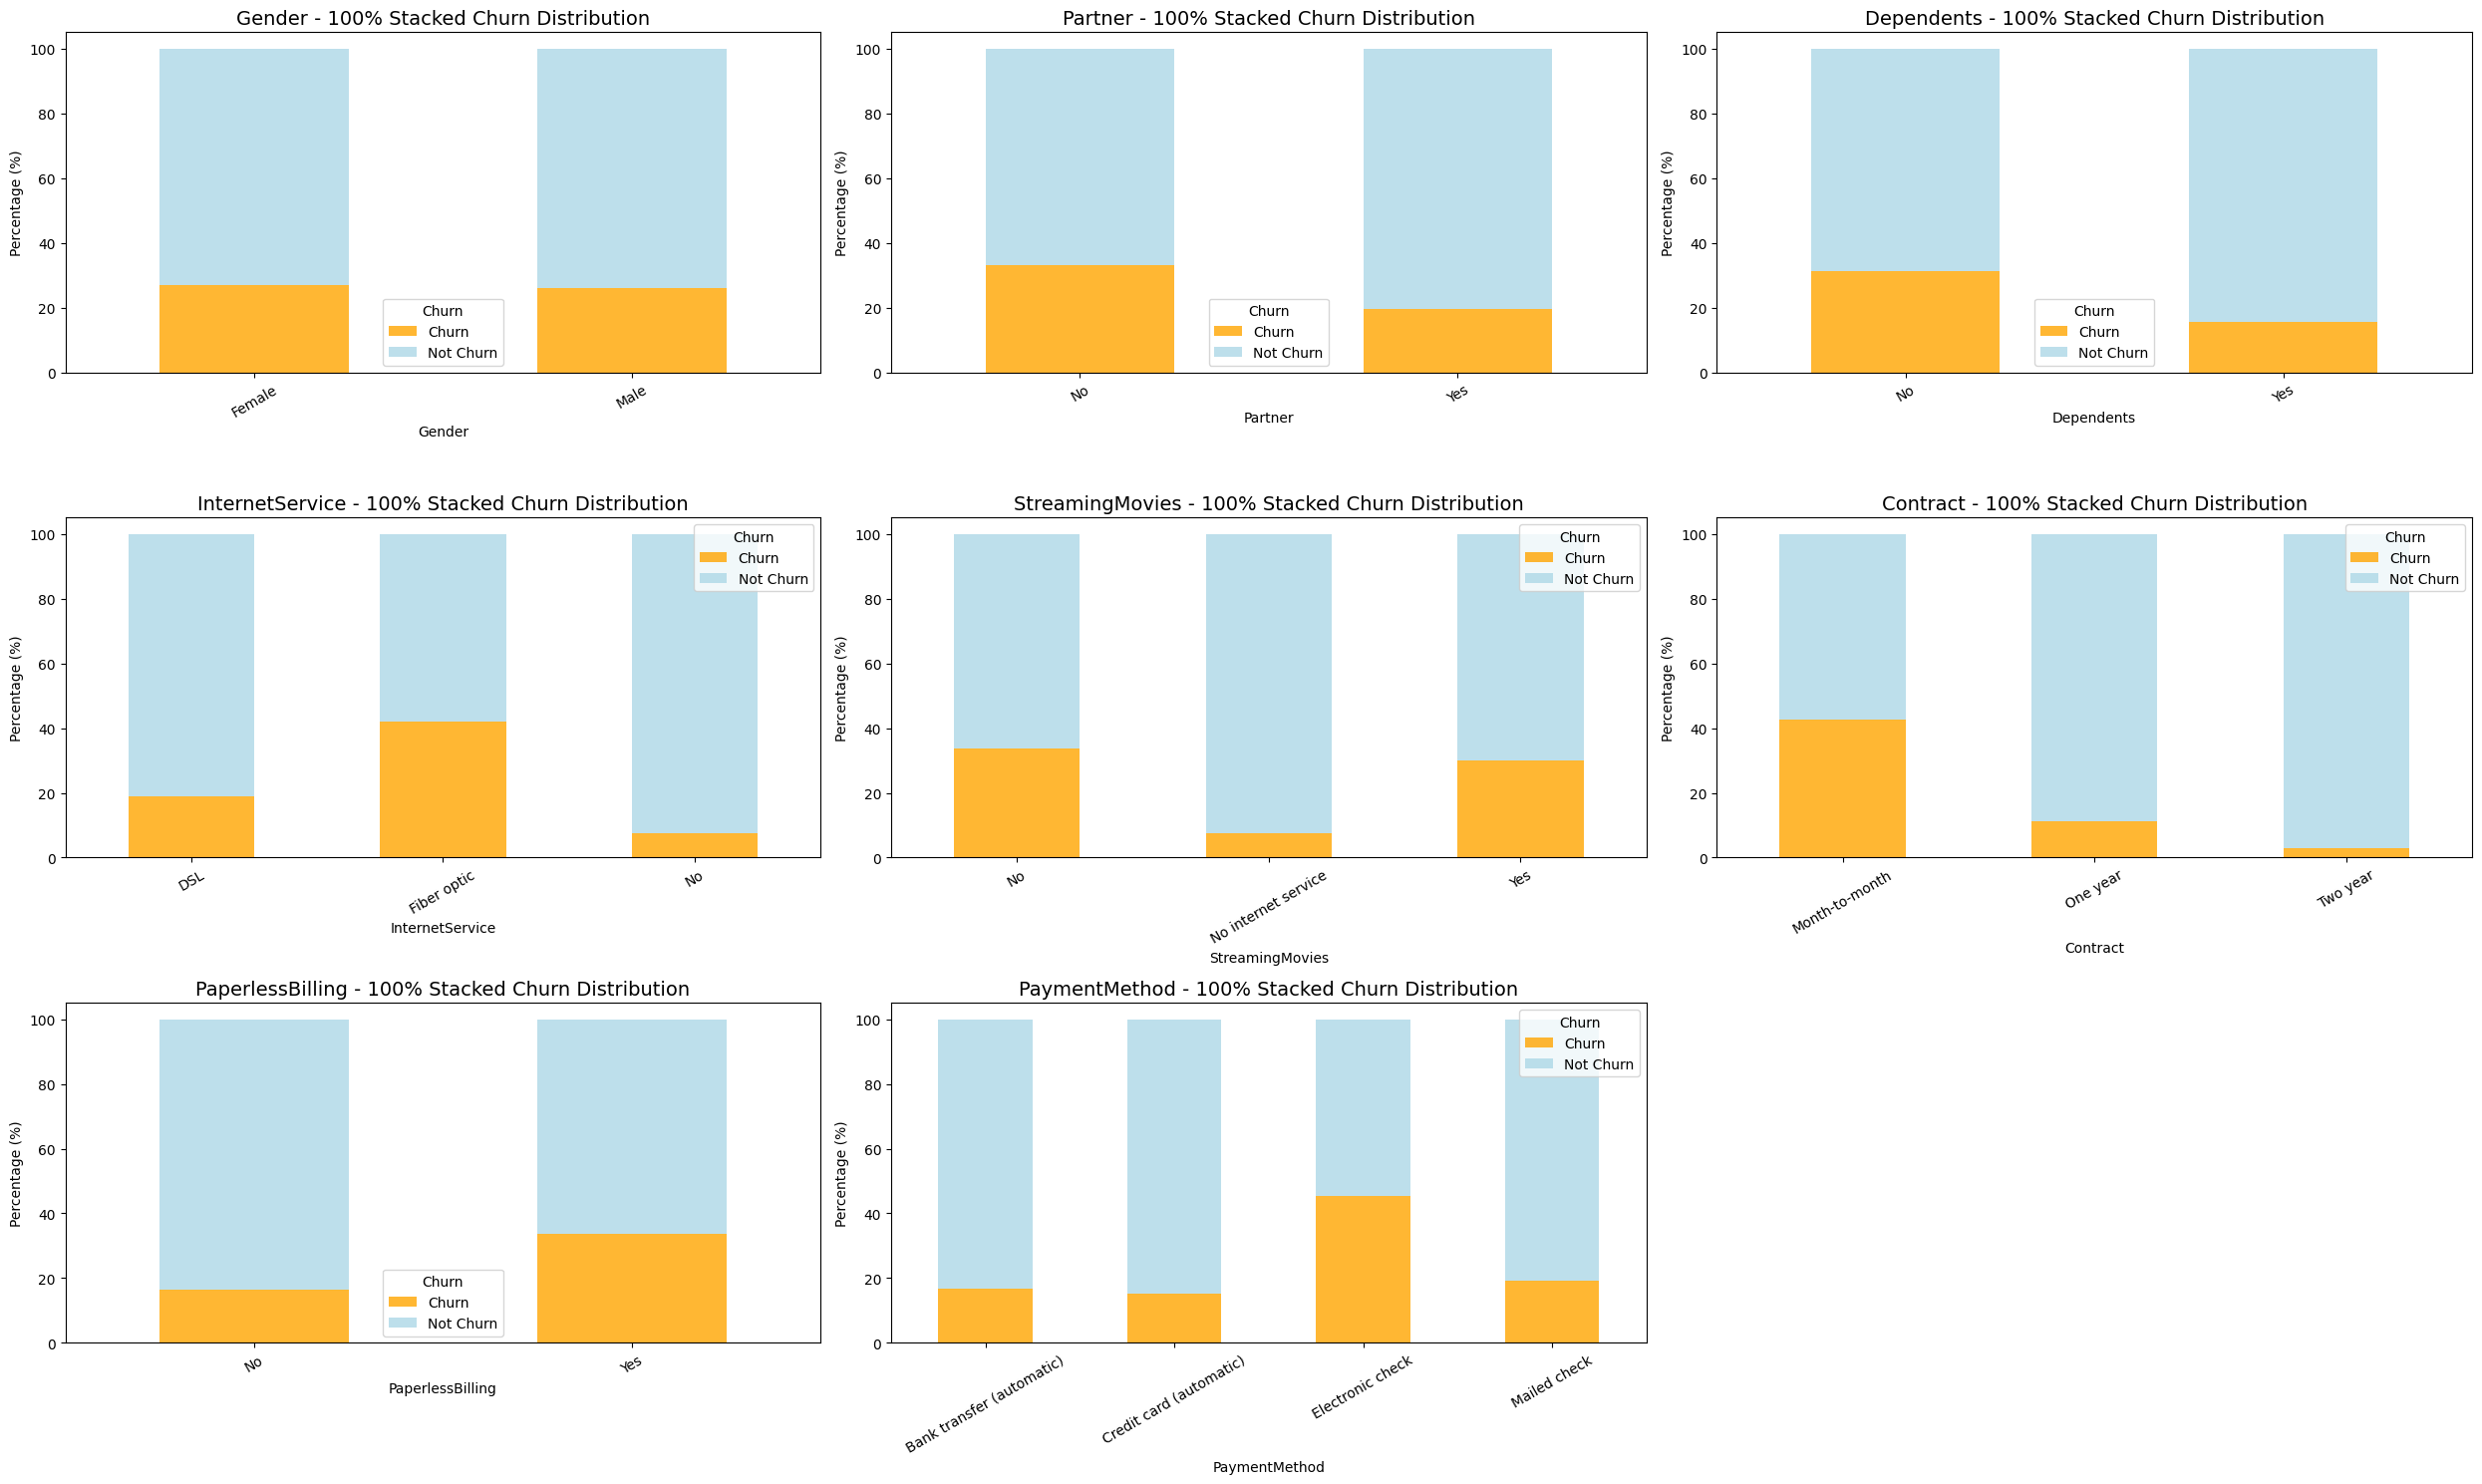

In [ ]:
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].map({'Yes': 'Churn', 'No': 'Not Churn'})

cat_cols = [
    'Gender', 'Partner', 'Dependents', 'InternetService',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# number of subplots
n = len(cat_cols)
rows = math.ceil(n / 3)
cols = 3

fig, axarr = plt.subplots(rows, cols, figsize=(25, rows * 5))
axarr = axarr.flatten()

for i, col in enumerate(cat_cols):

    # -------- percentage table for 100% stacked --------
    stacked_df = (
        df_plot.groupby(col)['Churn']
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        .mul(100)
    )

    # -------- plot 100% stacked bar --------
    stacked_df.plot(kind='bar',
                    stacked=True,
                    ax=axarr[i],
                    color=['orange', 'lightblue'],  # Not Churn = orange, Churn = lightblue
                    alpha=0.8)

    axarr[i].set_title(f"{col} - 100% Stacked Churn Distribution", fontsize=14)
    axarr[i].set_ylabel("Percentage (%)")
    axarr[i].set_xlabel(col)
    axarr[i].tick_params(axis='x', rotation=30)
    axarr[i].legend(title="Churn")

# remove empty axes
for j in range(i + 1, len(axarr)):
    fig.delaxes(axarr[j])

plt.tight_layout()
plt.show()


# 100% Stacked Distribution
#1. Gender vs Churn
*   **Findings:** Churn rate is slightly higher for females compared to males.
*   **Insights:** Gender has only a mild effect on churn — not a strong predictor.
*   **Recommendation:** No gender-based customer strategy required; focus on stronger churn drivers.
#2. Partner vs Churn
*   **Findings:** Customers without partners churn at a much higher rate.
*   **Insights:** Single or living-alone customers may have lower stickiness or income stability.
*   **Recommendation:** Create loyalty perks / bundles to improve retention among non-partner customers.
#3. Dependents vs Churn
*   **Findings:** Customers without dependents churn more often.
*   **Insights:** Families (with dependents) are more stable and value consistent service.
*   **Recommendation:** Offer family bundles or multi-device discounts to attract and retain this group.
#4. InternetService vs Churn
*   **Findings:** Fiber optic users have the highest churn. DSL has moderate churn; No-internet-service customers have very low churn.
*   **Insights:** Fiber optic plans are expensive — pushing price-sensitive customers to churn.
*   **Recommendation:** Reduce price friction for fiber plans through discounts or flexible billing.
#5. StreamingMovies vs Churn
*   **Findings:** Customers using streaming services (Movies/TV) churn slightly more than those who do not.
*   **Insights:** Heavy service users may be more aware of performance issues (speed/quality).
*   **Recommendation:** Ensure strong performance and promote streaming-optimized internet packages.
#6. Contract Type vs Churn
*   **Findings:** Highest churn: Month-to-month,Lowest churn: Two-year contract
*   **Insights:** Short-term contracts give customers easy exit options → more churn.
*   **Recommendation:** Push customers toward annual or two-year contracts using discounts or perks.
#7. PaperlessBilling vs Churn
*   **Findings:** Paperless billing customers churn more.
*   **Insights:** Paperless billing often correlates with month-to-month contracts and digital-only customers
*   **Recommendation:** Provide incentives for paperless customers to move to long-term contracts.
#8. PaymentMethod vs Churn
*   **Findings:** Highest churn: Electronic check users,Lowest churn: Automatic bank transfer / Credit card automatic
*   **Insights:** Electronic check users may face payment friction causing churn. Autopay customers are more stable and low-risk.
*   **Recommendation:** Promote auto-debit payment options with incentives (cashback/small discounts).


# 5.Feature Engineering

In [ ]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [ ]:
#Replacing binary column(categorical) values to 0's and 1's
binary_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_cols] = df[binary_cols].replace({'Yes':1, 'No':0, 'Female':0, 'Male':1})

/tmp/ipython-input-3027841751.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes':1, 'No':0, 'Female':0, 'Male':1})


In [ ]:
#Frequency Encoding
multi_class_cols = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

#PaymentMethod → 0,1,2,3 can confuse Logistic Regression.

# Frequency encoding without increasing columns
for col in multi_class_cols:
    freq = df[col].value_counts() / len(df)
    df[col] = df[col].map(freq)


In [ ]:
scaler = StandardScaler()
num_cols = ['Tenure','MonthlyCharges', 'TotalCharges']  # include discrete if you want
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]


,Tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470
...,...,...,...
7038,-0.340876,0.665992,-0.128655
7039,1.613701,1.277533,2.243151
7040,-0.870241,-1.168632,-0.854469
7041,-1.155283,0.320338,-0.872062


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          Train      Test
Churn                    
0      0.734469  0.735273
1      0.265531  0.264727


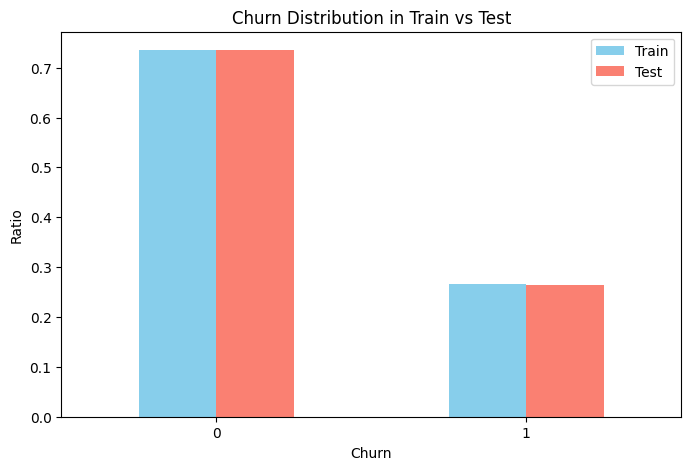

In [ ]:
# Count Churn in train and test as ratio
train_churn_ratio = y_train.value_counts(normalize=True)
test_churn_ratio = y_test.value_counts(normalize=True)

# Combine into a DataFrame for comparison
churn_ratio = pd.DataFrame({
    'Train': train_churn_ratio,
    'Test': test_churn_ratio
})

print(churn_ratio)

# Plot comparison
churn_ratio.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title("Churn Distribution in Train vs Test")
plt.ylabel("Ratio")
plt.xticks(rotation=0)
plt.show()


In [ ]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class balance after upsampling
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

Churn
0    4138
1    4138
Name: count, dtype: int64
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # ❗ NO SMOTE on test


# 6.Model Building

#### Logistic Regression (Classifier)

In [ ]:
log_params = {
    'C':[0.01,0.1,1,10],
    'penalty':['l2'],
    'solver':['lbfgs','liblinear']
}

log_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_params, scoring='f1_weighted', verbose=3, n_jobs=-1)
log_grid.fit(X_train, y_train)

log_pred = log_grid.predict(X_test)

print("Logistic Regression Best Params:", log_grid.best_params_)
print("F1 Score:", f1_score(y_test, log_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Logistic Regression Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
F1 Score: 0.7738844394654143
Confusion Matrix:
 [[770 266]
 [ 70 303]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [ ]:
best_log = log_grid.best_estimator_

# Extract coefficients
coeff = best_log.coef_[0]

# Create feature importance table
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance(abs)': np.abs(coeff)
}).sort_values(by='Importance(abs)', ascending=False)

print("\nLogistic Regression Feature Importance:\n")
print(feature_importance)

# Importance(abs) helps you rank the features
# Coefficient tells whether it increases or decreases churn probability



Logistic Regression Feature Importance:

             Feature  Importance(abs)
13   StreamingMovies         8.734614
12       StreamingTV         6.428228
16     PaymentMethod         3.561395
7    InternetService         3.497400
11       TechSupport         3.140556
8     OnlineSecurity         2.989333
9       OnlineBackup         2.879074
14          Contract         2.581513
10  DeviceProtection         1.406037
4             Tenure         1.335490
5       PhoneService         0.969098
18      TotalCharges         0.674360
17    MonthlyCharges         0.538280
15  PaperlessBilling         0.299981
3         Dependents         0.293256
6      MultipleLines         0.146328
2            Partner         0.069658
1      SeniorCitizen         0.042996
0             Gender         0.001294


#### KNN

In [ ]:
knn_params = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'p':[1,2]  # Manhattan (1) or Euclidean (2)
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='f1_weighted', verbose=3, n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn_pred = knn_grid.predict(X_test)

print("KNN Best Params:", knn_grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN Best Params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Confusion Matrix:
 [[783 253]
 [149 224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1036
           1       0.47      0.60      0.53       373

    accuracy                           0.71      1409
   macro avg       0.65      0.68      0.66      1409
weighted avg       0.74      0.71      0.72      1409



In [ ]:
best_knn = knn_grid.best_estimator_

result = permutation_importance(
    best_knn,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42
)

knn_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nKNN Feature Importance (Permutation Based):\n")
print(knn_importance)



KNN Feature Importance (Permutation Based):

             Feature  Importance
4             Tenure    0.011214
17    MonthlyCharges    0.009297
16     PaymentMethod    0.002271
1      SeniorCitizen    0.002200
5       PhoneService    0.000923
12       StreamingTV    0.000497
15  PaperlessBilling   -0.000071
0             Gender   -0.000426
18      TotalCharges   -0.000923
9       OnlineBackup   -0.001278
14          Contract   -0.001703
13   StreamingMovies   -0.002342
11       TechSupport   -0.003691
7    InternetService   -0.004045
10  DeviceProtection   -0.004187
6      MultipleLines   -0.004329
3         Dependents   -0.004400
2            Partner   -0.005394
8     OnlineSecurity   -0.013556


#### Random Forest

In [ ]:
rf_params = {
    'n_estimators':[100,200],
    'max_depth':[None,5,10],
    'criterion':['gini','entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, scoring='f1_weighted', verbose=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_pred = rf_grid.predict(X_test)

print("Random Forest Best Params:", rf_grid.best_params_)
print("F1 Score:", f1_score(y_test, rf_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest Best Params: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
F1 Score: 0.7922941871399373
Confusion Matrix:
 [[921 115]
 [170 203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Get best model
best_rf = rf_grid.best_estimator_

# Extract importance scores
importance = best_rf.feature_importances_

# Create table
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:\n")
print(rf_importance)



Random Forest Feature Importance:

             Feature  Importance
18      TotalCharges    0.132467
17    MonthlyCharges    0.123241
4             Tenure    0.115453
14          Contract    0.111502
16     PaymentMethod    0.102737
8     OnlineSecurity    0.079871
11       TechSupport    0.059058
9       OnlineBackup    0.050328
10  DeviceProtection    0.035048
6      MultipleLines    0.029933
7    InternetService    0.023892
13   StreamingMovies    0.023276
0             Gender    0.020943
15  PaperlessBilling    0.020661
12       StreamingTV    0.020028
2            Partner    0.018365
3         Dependents    0.015583
1      SeniorCitizen    0.013827
5       PhoneService    0.003787


#### Support Vector Machine

In [ ]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

svm_grid = GridSearchCV(
    SVC(),              # no probability=True
    svm_params,
    scoring='f1_weighted',
    cv=3,               # reduce folds also
    verbose=3,
    n_jobs=-1
)

svm_grid.fit(X_train_scaled, y_train)
svm_pred = svm_grid.predict(X_test_scaled)

print("SVM Best Params:", svm_grid.best_params_)
print("F1 Score:", f1_score(y_test, svm_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
SVM Best Params: {'C': 10, 'kernel': 'rbf'}
F1 Score: 0.7861511664889922
Confusion Matrix:
 [[829 207]
 [105 268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1036
           1       0.56      0.72      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



In [ ]:
best_svm = svm_grid.best_estimator_

# Check if kernel is linear
if best_svm.kernel == 'linear':
    coeff = best_svm.coef_[0]

    svm_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance(abs)': np.abs(coeff),
        'Coefficient': coeff
    }).sort_values(by='Importance(abs)', ascending=False)

    print("\nSVM Feature Importance (Linear Kernel):\n")
    print(svm_importance)

else:
    print("\nFeature importance not available for non-linear kernels like RBF.")
    print("Best Kernel Selected:", best_svm.kernel)



Feature importance not available for non-linear kernels like RBF.
Best Kernel Selected: rbf


####XG Boost

In [ ]:
xgb_params = {
    'n_estimators':[100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1],
    'subsample':[0.8,1]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb_clf, xgb_params, scoring='f1_weighted', verbose=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_pred = xgb_grid.predict(X_test)

print("XGBoost Best Params:", xgb_grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:59:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Confusion Matrix:
 [[902 134]
 [152 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1036
           1       0.62      0.59      0.61       373

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409



In [ ]:
# Best model from GridSearch
best_xgb = xgb_grid.best_estimator_

# XGBoost gives feature importance directly
importance = best_xgb.feature_importances_

# Create table
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:\n")
print(xgb_importance)



XGBoost Feature Importance:

             Feature  Importance
14          Contract    0.346038
8     OnlineSecurity    0.129276
7    InternetService    0.090463
11       TechSupport    0.081765
9       OnlineBackup    0.051854
16     PaymentMethod    0.049347
6      MultipleLines    0.038200
13   StreamingMovies    0.034306
12       StreamingTV    0.029381
10  DeviceProtection    0.027110
4             Tenure    0.022764
5       PhoneService    0.016896
15  PaperlessBilling    0.014079
3         Dependents    0.013802
17    MonthlyCharges    0.013234
18      TotalCharges    0.011344
1      SeniorCitizen    0.011203
0             Gender    0.010651
2            Partner    0.008288


#### Decision Tree

In [ ]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'splitter': ['best', 'random']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring='f1_weighted', verbose=3, n_jobs=-1)
dt_grid.fit(X_train, y_train)

dt_pred = dt_grid.predict(X_test)

print("Decision Tree Best Params:", dt_grid.best_params_)
print("F1 Score:", f1_score(y_test, dt_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Decision Tree Best Params: {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'random'}
F1 Score: 0.7462283619043292
Confusion Matrix:
 [[817 219]
 [148 225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Get best model
best_dt = dt_grid.best_estimator_

# Extract importance values
importance = best_dt.feature_importances_

# Create table
dt_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nDecision Tree Feature Importance:\n")
print(dt_importance)



Decision Tree Feature Importance:

             Feature  Importance
14          Contract    0.308172
4             Tenure    0.092523
16     PaymentMethod    0.081084
18      TotalCharges    0.068227
7    InternetService    0.058264
13   StreamingMovies    0.050738
8     OnlineSecurity    0.044197
17    MonthlyCharges    0.042653
6      MultipleLines    0.040608
11       TechSupport    0.030377
0             Gender    0.027313
9       OnlineBackup    0.025510
15  PaperlessBilling    0.024375
2            Partner    0.023202
12       StreamingTV    0.020236
10  DeviceProtection    0.020028
3         Dependents    0.019459
1      SeniorCitizen    0.016237
5       PhoneService    0.006797


#### Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

print("F1 Score:", f1_score(y_test, nb_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

F1 Score: 0.7160767012297954
Confusion Matrix:
 [[661 375]
 [ 50 323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.64      0.76      1036
           1       0.46      0.87      0.60       373

    accuracy                           0.70      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.70      0.72      1409



In [ ]:
best_nb = nb

# theta_ contains mean of each feature per class
theta = best_nb.theta_   # shape: (n_classes, n_features)

# Importance = std deviation across class means
importance = theta.std(axis=0)

nb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nNaive Bayes Feature Importance:\n")
print(nb_importance)


Naive Bayes Feature Importance:

             Feature  Importance
4             Tenure    0.384658
17    MonthlyCharges    0.216073
18      TotalCharges    0.213711
15  PaperlessBilling    0.108627
3         Dependents    0.090140
2            Partner    0.082407
14          Contract    0.072548
1      SeniorCitizen    0.057395
8     OnlineSecurity    0.048593
11       TechSupport    0.047220
7    InternetService    0.029951
9       OnlineBackup    0.027380
10  DeviceProtection    0.026588
12       StreamingTV    0.018492
13   StreamingMovies    0.018308
16     PaymentMethod    0.018232
0             Gender    0.003021
5       PhoneService    0.003021
6      MultipleLines    0.000149
